In [2]:
from astrodbkit import astrodb

In [3]:
db = astrodb.Database("bdnycdev1.db")

Database ready for use


In [4]:
db.info()


Database path: bdnycdev1.db 
SQL path: bdnycdev1.sql

Database Inventory
SOURCES: 1938
CHANGELOG: 205
DATA_REQUESTS: 27
IGNORE: 122
INSTRUMENTS: 54
MODES: 7
PARALLAXES: 436
PHOTOMETRY: 10358
PROPER_MOTIONS: 599
PUBLICATIONS: 607
RADIAL_VELOCITIES: 143
SPECTRA: 3614
SPECTRAL_TYPES: 1511
SYSTEMS: 15
TELESCOPES: 38
VERSIONS: 2


In [6]:
db.help()


The astrodb.Database class, hereafter db, provides a variety of methods to interact with a SQLite database file.
Docstrings are available for all methods and can be accessed in the usual manner; eg, help(db.query).
We list a few key methods below.

    Methods to explore the database:
    * db.query() - send SELECT commands to the database. Returns results in a variety of formats
    * db.info() - get a quick summary of the contents of the database
    * db.schema() - quickly examine the columns, types, etc of a specified table
    * db.search() - search through a table to find entries matching the criteria
    * db.inventory() - search for all entries that match the specified source_id
    * db.references() - search for all entries in all tables matching the criteria. Useful for publications

    Methods to modify the database:
    * db.add_data() - add data to an existing table, either by providing a file or by providing the data itself
    * db.table() - create or modify tables in 

In [7]:
db.query("SELECT * FROM sources LIMIT 5", fmt = "pandas")

,comments,companions,components,dec,designation,id,names,publication_shortname,ra,shortname,unum,version
0,,None,None,18.333275,SDSS J16585026+1820006,1,SDSS J16585026+1820006,West08,254.709737,1658+1820,U51440,2.0
1,,None,None,-1.280556,2MASS J13314894-0116500,2,"SDSS J133148.92-011651.4, 2MASS J13314894-0116500",Hawl02,202.953870,1331-0116,U50174,2.0
2,None,None,"1619,1620",-4.105361,2MASS J23310161-0406193,3,2MASS J23310161-0406193,Gizi00,352.756710,2331-0406,U12191,2.0
3,None,None,None,10.533056,2MASS J14482563+1031590,4,"2MASS J14482563+1031590, 2MASSW J1448256+10315...",Wils03b,222.106791,1448+1031,U20587,1.0
4,None,None,None,3.281762,2MASS J14432796+0316543,5,LSPM J1443+0316,LSPM-N,220.866530,1443+0316,U20585,2.0


In [8]:
NIR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='NIR' order by source_id", fmt="pandas")

In [9]:
OPT_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='OPT' order by source_id", fmt="pandas")
IR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='IR' order by source_id", fmt="pandas")

In [10]:
len(IR_spectraltype)

503

In [11]:
len(OPT_spectraltype)

483

In [12]:
len(NIR_spectraltype)

17

In [13]:
import matplotlib.pyplot as plt
import

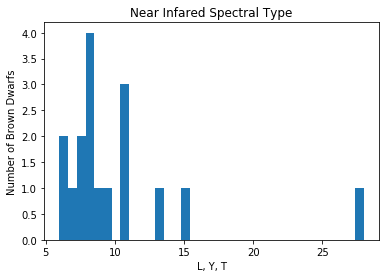

In [65]:
plt.hist(NIR_spectraltype["spectral_type"], 35)
plt.title(("Near Infared Spectral Type"))
plt.xlabel("L, Y, T")
plt.ylabel("Number of Brown Dwarfs")
plt.show()

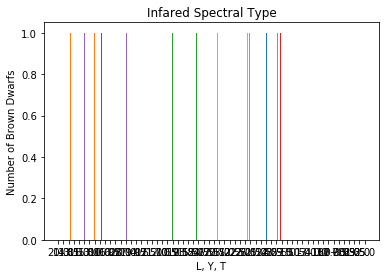

In [33]:
plt.hist(IR_spectraltype["spectral_type"], 30)
plt.title(("Infared Spectral Type"))
plt.xlabel("L, Y, T")
plt.ylabel("Number of Brown Dwarfs")
plt.show()

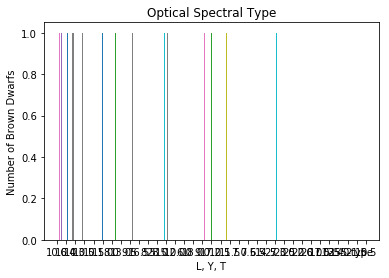

In [32]:
plt.hist(OPT_spectraltype["spectral_type"], 15)
plt.title(("Optical Spectral Type"))
plt.xlabel("L, Y, T")
plt.ylabel("Number of Brown Dwarfs")
plt.show()

In [54]:

#SQUASH DIS BUG!: complete this code to convert our strings into floats (aka decimals)
nIR_spectraltypes = []
for i in IR_spectraltype['spectral_type']:
    try:
        correct_values = float(i)
        nIR_spectraltypes.append(correct_values)
    except ValueError:
        print(i , 'cannot be converted')



L7+L8 cannot be converted


In [56]:
len(nIR_spectraltypes)

502

In [57]:
nOPT_spectraltypes = []
for i in OPT_spectraltype['spectral_type']:
    try:
        correct_values = float(i)
        nOPT_spectraltypes.append(correct_values)
    except ValueError:
        print(i , 'cannot be converted')

L1-L4 cannot be converted
0355-type cannot be converted


In [60]:
len(nOPT_spectraltypes)

481

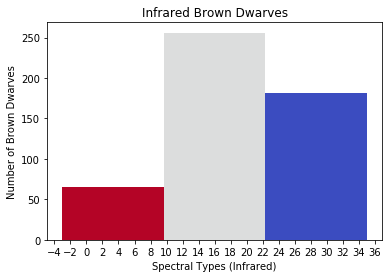

In [112]:
plt.title("Infrared Brown Dwarves")
plt.ylabel("Number of Brown Dwarves")
plt.xlabel("Spectral Types (Infrared)")
plt.xticks(range(-4, 40, 2))
cm = plt.cm.get_cmap('coolwarm_r')

# Plot histogram.
n, bins, patches = plt.hist(nIR_spectraltypes, 3)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))
plt.show()

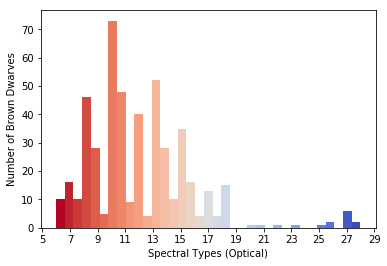

In [99]:
"Near Optical Brown Dwarves"
plt.ylabel("Number of Brown Dwarves")
plt.xlabel("Spectral Types (Optical)")
plt.xticks(range(5, 30, 2))
cm = plt.cm.get_cmap('coolwarm_r')

# Plot histogram.
n, bins, patches = plt.hist(nOPT_spectraltypes, 35)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))
plt.show() 

#can see more hotter stars because hotter objects peak in visible light --> normal stars

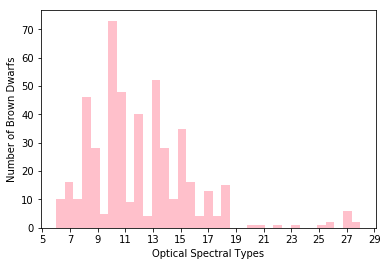

In [90]:
# hasn't changed

plt.hist(nOPT_spectraltypes, 35, color = ["pink"])
plt.xlabel("Optical Spectral Types")
plt.xticks(range(5, 30, 2))
plt.ylabel("Number of Brown Dwarfs")
plt.show()